Covid világjárvány kezdete: 2020-03-11

Vége: 2023-05-05

In [2]:
import pandas as pd

In [3]:
def adatcsv(start_date,end_date,countries,delete_columns=[]):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["iso_code"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df.drop(delete_columns, axis=1)

    return df





In [4]:
eu_members= [
    "AUT",  
    "BEL",  
    "BGR",  
    "CYP",  
    "CZE",  
    "DEU",  
    "DNK",  
    "EST",  
    "ESP",  
    "FIN",  
    "FRA",  
    "GRC",  
    "HRV",  
    "HUN",  
    "IRL",  
    "ITA",  
    "LTU",  
    "LUX",  
    "LVA",  
    "MLT",  
    "NLD",  
    "POL",  
    "PRT",  
    "ROU",  
    "SWE",  
    "SVN",  
    "SVK",  
]
eu=adatcsv("2020-02-15","2023-05-05",eu_members)

In [5]:
eu
eu.to_csv('eu.csv', index=False)
eu = pd.read_csv('eu.csv')
eu

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AUT,Europe,Austria,2020-02-15,NaN,0.0,NaN,0.0,NaN,NaN,...,30.9,NaN,7.37,81.54,0.922,8939617,NaN,NaN,NaN,NaN
1,AUT,Europe,Austria,2020-02-16,NaN,0.0,NaN,0.0,NaN,NaN,...,30.9,NaN,7.37,81.54,0.922,8939617,-610.0,-4.76,-6.44,-68.47946
2,AUT,Europe,Austria,2020-02-17,NaN,0.0,NaN,0.0,NaN,NaN,...,30.9,NaN,7.37,81.54,0.922,8939617,NaN,NaN,NaN,NaN
3,AUT,Europe,Austria,2020-02-18,NaN,0.0,NaN,0.0,NaN,NaN,...,30.9,NaN,7.37,81.54,0.922,8939617,NaN,NaN,NaN,NaN
4,AUT,Europe,Austria,2020-02-19,NaN,0.0,NaN,0.0,NaN,NaN,...,30.9,NaN,7.37,81.54,0.922,8939617,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31747,SWE,Europe,Sweden,2023-05-01,2706119.0,0.0,24102.0,0.0,NaN,NaN,...,18.9,NaN,2.22,82.80,0.945,10549349,NaN,NaN,NaN,NaN
31748,SWE,Europe,Sweden,2023-05-02,2706119.0,0.0,24102.0,0.0,NaN,NaN,...,18.9,NaN,2.22,82.80,0.945,10549349,NaN,NaN,NaN,NaN
31749,SWE,Europe,Sweden,2023-05-03,2706119.0,0.0,24102.0,0.0,NaN,NaN,...,18.9,NaN,2.22,82.80,0.945,10549349,NaN,NaN,NaN,NaN
31750,SWE,Europe,Sweden,2023-05-04,2706119.0,0.0,24102.0,0.0,NaN,NaN,...,18.9,NaN,2.22,82.80,0.945,10549349,NaN,NaN,NaN,NaN


### **Lineáris regresszió**
#### Lineáris regresszióval határozzuk meg azokat az együtthatókat, amik jól leírják a járvány súlyosságát egy adott országban
 Adott a **dependent variable**, jelen esetben ez $\gamma=\frac{infected}{population}$ és az **independent variable**-k $X_i$-k, amiktől függ(het) a $\gamma$.
 
 $y_i$-k lesznek a $\gamma$ mért adatai a modellben.
 

In [1]:
# inkább Finnországra halálozások száma a fertőzőttek és intenzív esetek számára

In [6]:
print(eu.columns.tolist())

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smo

In [7]:
gamma_datas=[]
last_occured=[]
for country in eu_members:
    last_occurrence_index = eu[eu['iso_code'] == country].index[-1]
    gamma_datas.append(eu.iloc[last_occurrence_index,4]/eu.iloc[last_occurrence_index,50])
    last_occured.append(last_occurrence_index)
last_occured

[1175,
 2351,
 3527,
 5879,
 7055,
 12935,
 8231,
 9407,
 30575,
 10583,
 11759,
 14111,
 4703,
 15287,
 16463,
 17639,
 19991,
 21167,
 18815,
 22343,
 23519,
 24695,
 25871,
 27047,
 31751,
 29399,
 28223]

Melyik adatoktól akarjuk függővé tenni a **depentent variable**-t?

Legyenek: total_cases, total_deaths, gdp_per_capita, total_vaccinations

In [8]:
import numpy as np

In [16]:
total_cases=[]
total_deaths=[]
gdp_per_capita=[]
total_vacciantions=[]
xi_k=[total_cases,total_deaths,gdp_per_capita,total_vacciantions]
xi_indexes=[]

xi_valtozok=['total_cases', 'total_deaths', 'gdp_per_capita', 'total_vaccinations']
for valtozok in xi_valtozok:
    xi_indexes.append(eu.columns.tolist().index(valtozok))

def addlastvalid(countries,xi,xi_list):
    for country in countries:
        condition = eu['iso_code'] == country
        filtered_eu = eu[condition]
        last_valid_value = filtered_eu[xi].dropna().iloc[-1]
        xi_list.append(last_valid_value)

for i in range(len(xi_valtozok)):
    addlastvalid(eu_members,xi_valtozok[i],xi_k[i])  

xi_k=np.transpose(np.array(xi_k))
gamma_datas=np.array(gamma_datas)
    

In [17]:
np.shape(xi_k), np.shape(gamma_datas)

((27, 4), (27,))

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linmodel = LinearRegression().fit(xi_k, gamma_datas)
print("Intercept:", linmodel.intercept_)
print("Coefficients:", linmodel.coef_)

Intercept: 0.41500622939848175
Coefficients: [ 2.38117367e-08 -3.06124281e-06  9.37111103e-07 -1.48900067e-09]


In [ ]:
#TODO valamit az együtthatókkal

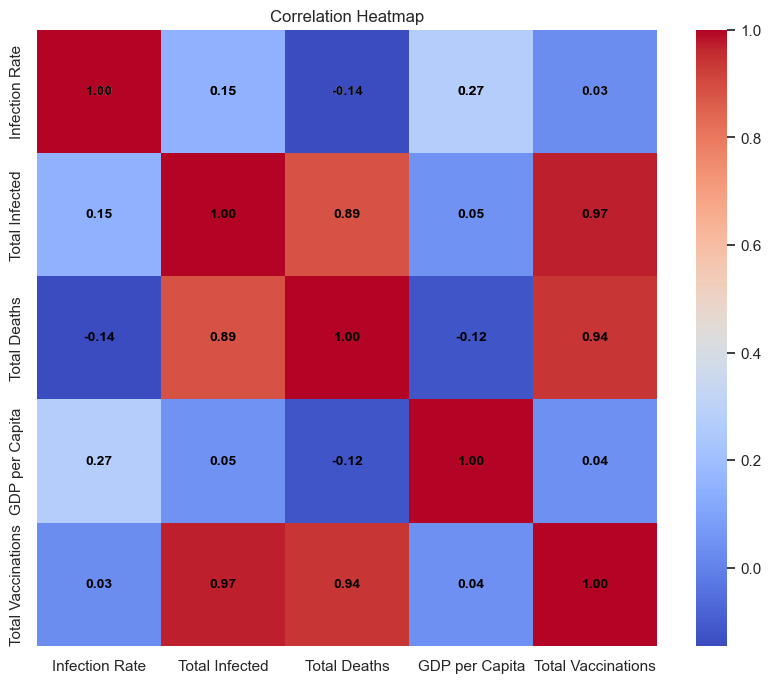

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


adatok = {
    'Infection Rate': gamma_datas,
    'Total Infected': total_cases,
    'Total Deaths': total_deaths,  
    'GDP per Capita': gdp_per_capita, 
    'Total Vaccinations': total_vacciantions 
}

df = pd.DataFrame(adatok)

corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        text = f'{corr_matrix.iloc[i, j]:.2f}'
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=10, fontweight='bold')
plt.show()